--- Analysis Table (Random Data) ---

| Data Size | Dynamic Array Time (s) | Dynamic Stack Time (s) | Priority Queue Time (s) |
|-----------|------------------------|------------------------|--------------------------|
| 100 | 0.000052 | 0.000087 | 0.000118 |
| 1,000 | 0.000174 | 0.044329 | 0.001013 |
| 10,000 | 0.001731 | 0.005937 | 0.012018 |
| 100,000 | 0.023777 | 0.071539 | 0.291992 |
| 250,000 | 0.053460 | 0.864560 | 1.003779 |
| 500,000 | 0.107475 | 1.756041 | 2.482018 |
| 750,000 | 0.187502 | 1.536199 | 4.352568 |
| 1,000,000 | 0.229306 | 1.887859 | 5.867494 |

--- Analysis Table (Sorted Data) ---

| Data Size | Dynamic Array Time (s) | Dynamic Stack Time (s) | Priority Queue Time (s) |
|-----------|------------------------|------------------------|--------------------------|
| 100 | 0.000046 | 0.000096 | 0.000160 |
| 1,000 | 0.000175 | 0.000580 | 0.001571 |
| 10,000 | 0.001687 | 0.005749 | 0.012712 |
| 100,000 | 0.022945 | 0.206252 | 0.322420 |
| 250,000 | 0.054612 | 0.440210 |

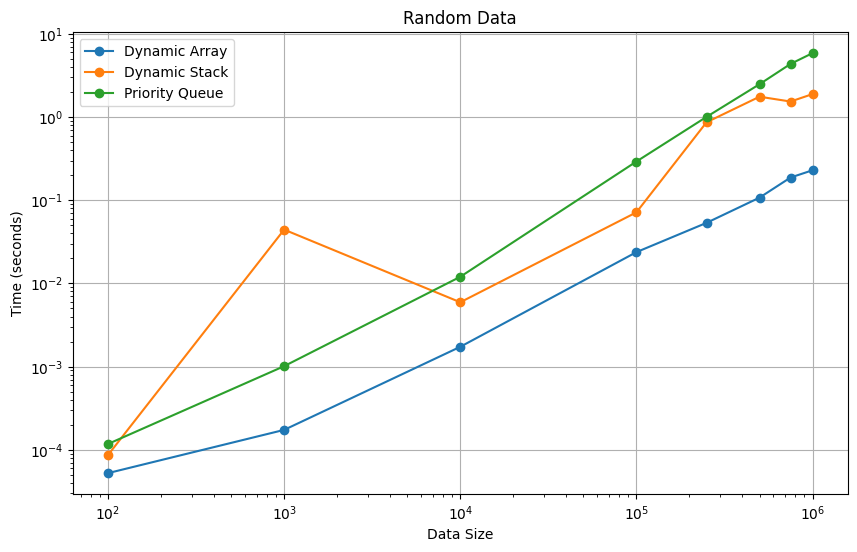

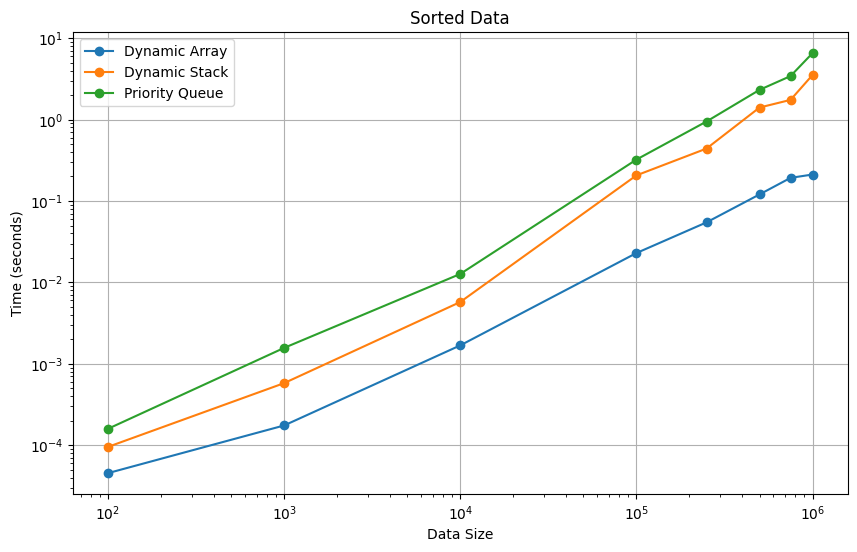

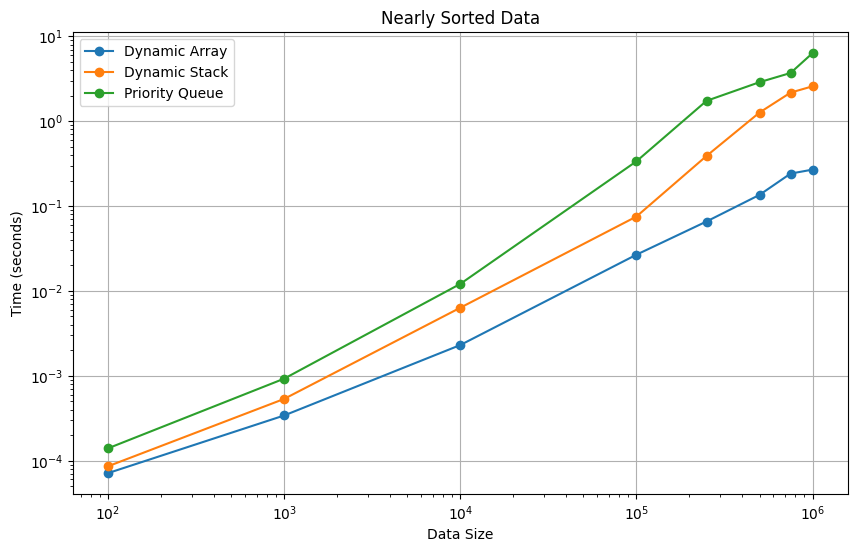

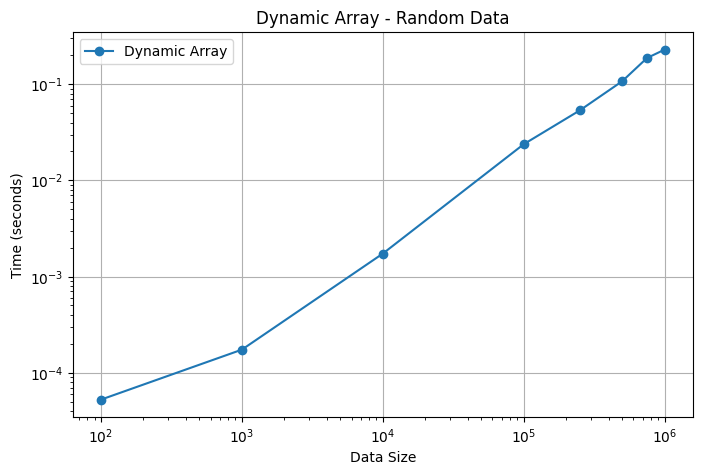

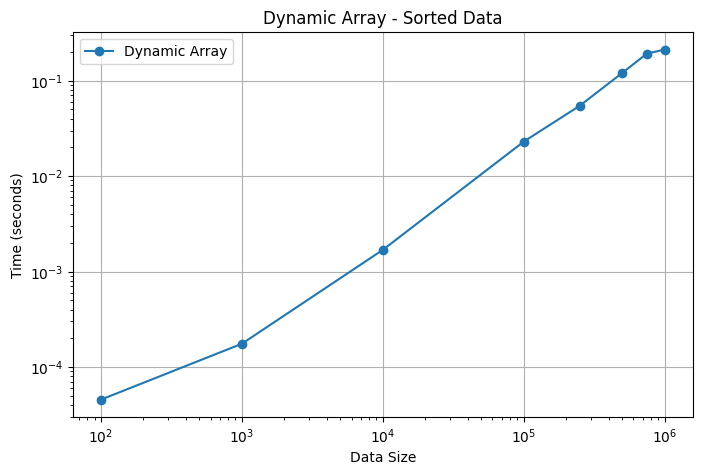

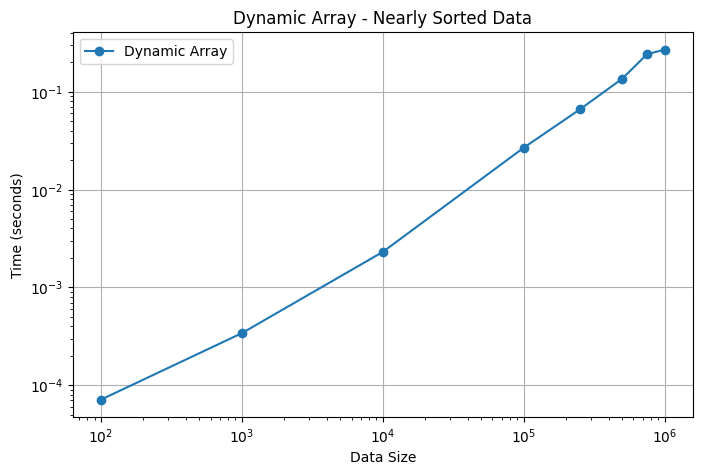

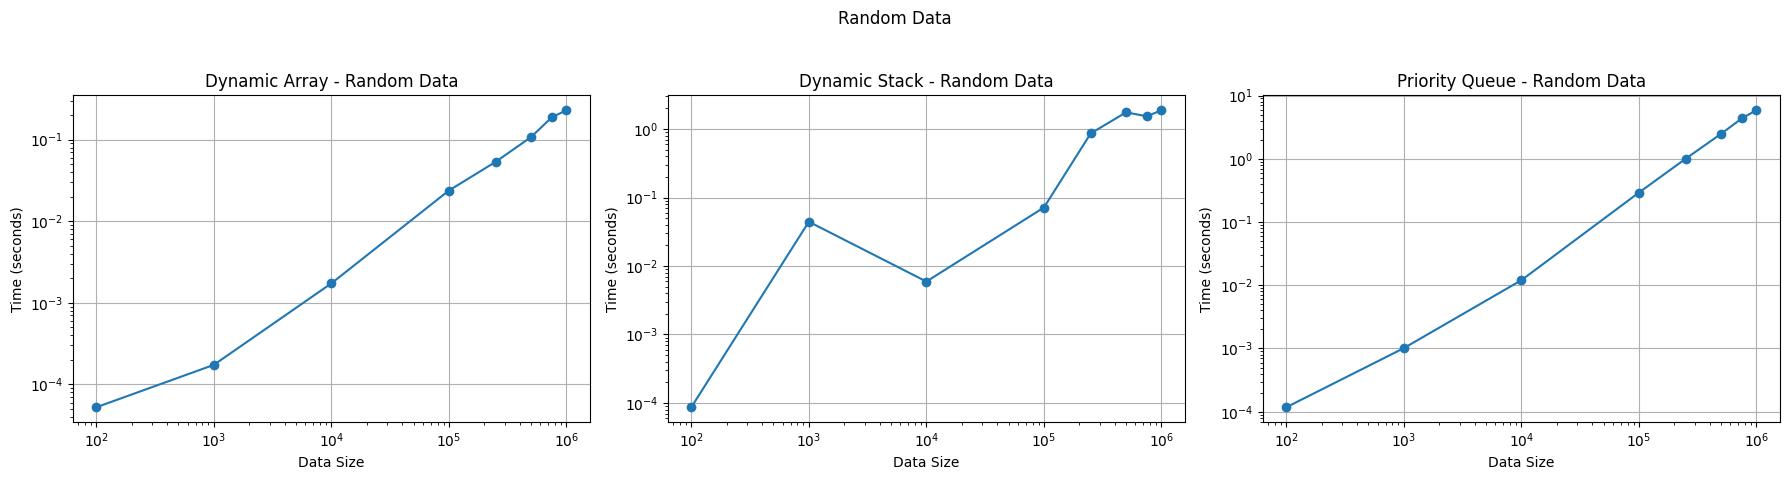

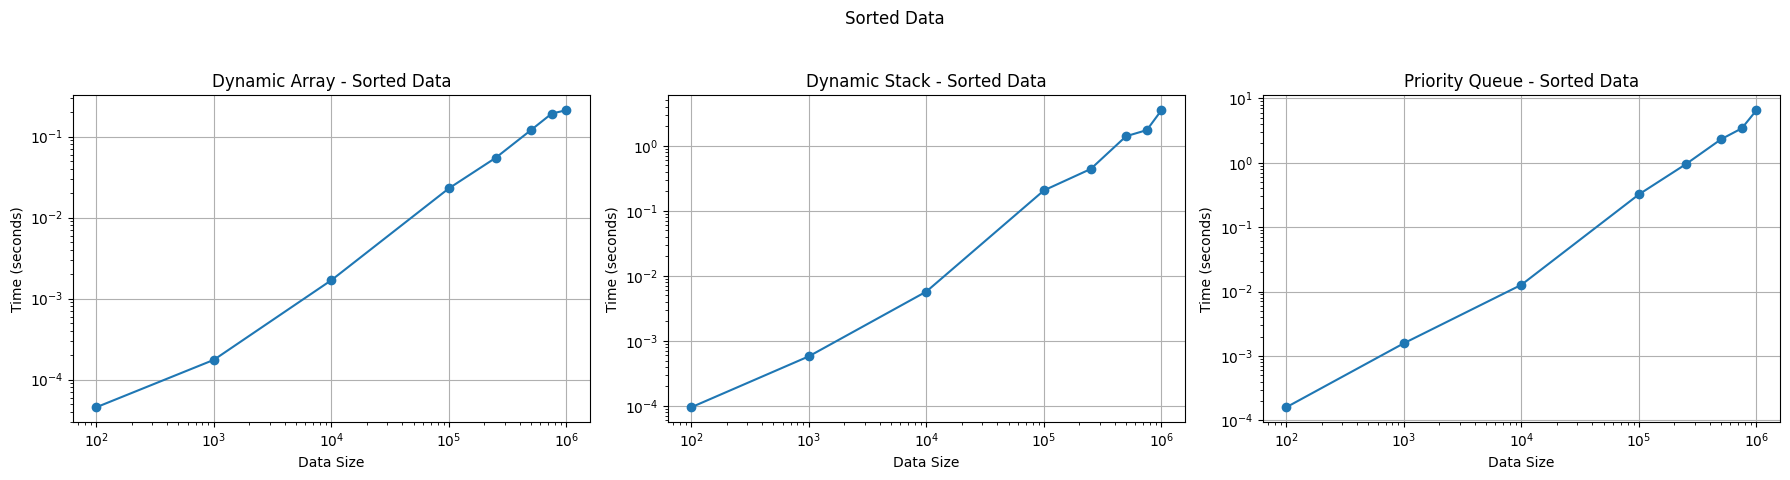

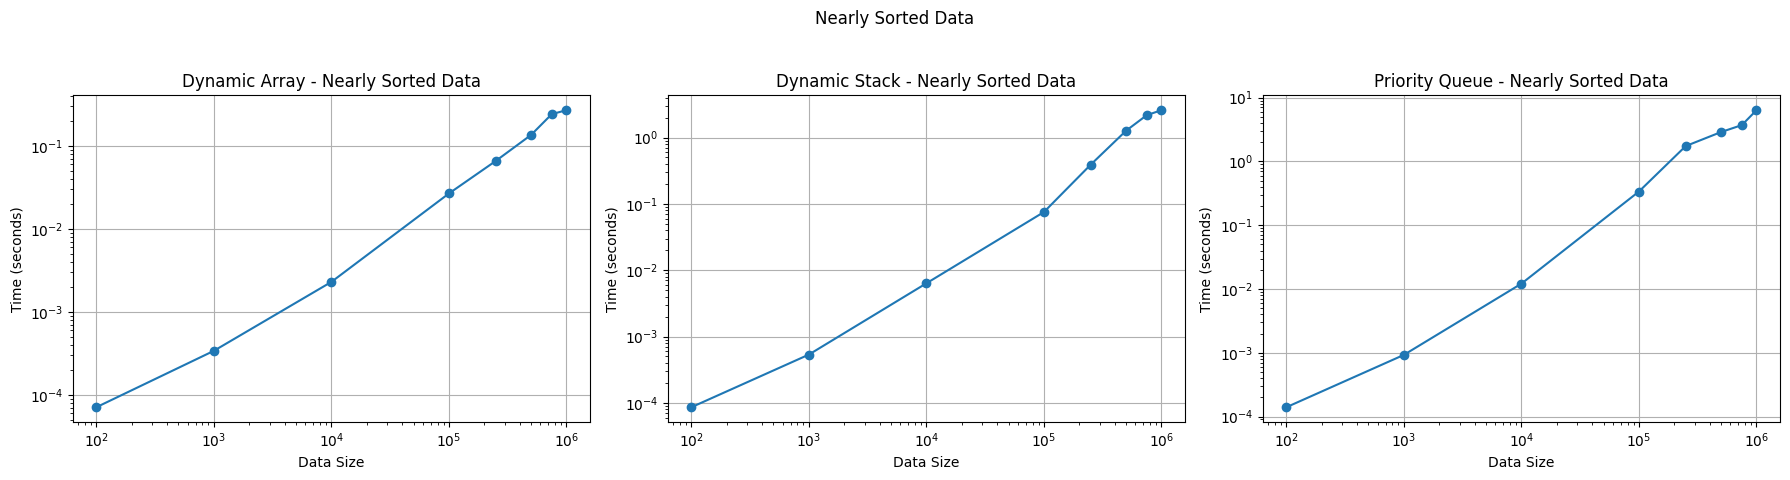

In [2]:
import time
import random
import heapq  # Python's built-in heap implementation
import matplotlib.pyplot as plt
import numpy as np

# --- Dataset Generation and Storage ---

def generate_random_dataset(size, filename="random_data.txt"):
    """Generates a list of random integers and stores it in a text file."""
    data = [random.randint(0, size * 10) for _ in range(size)]  # Wider range
    with open(filename, "w") as f:
        for item in data:
            f.write(str(item) + "\n")
    return data

def generate_sorted_dataset(size, filename="sorted_data.txt"):
    """Generates a list of sorted integers and stores it in a text file."""
    data = list(range(size))
    with open(filename, "w") as f:
        for item in data:
            f.write(str(item) + "\n")
    return data

def generate_nearly_sorted_dataset(size, inversions=0.05, filename="nearly_sorted_data.txt"):
    """Generates a nearly sorted list and stores it in a text file."""
    data = list(range(size))
    num_inversions = int(size * inversions)
    for _ in range(num_inversions):
        i, j = random.sample(range(size), 2)
        data[i], data[j] = data[j], data[i]
    with open(filename, "w") as f:
        for item in data:
            f.write(str(item) + "\n")
    return data

def load_dataset(filename):
    """Loads a dataset from a text file."""
    data = []
    with open(filename, "r") as f:
        for line in f:
            try:
                data.append(int(line.strip()))  # Ensure integers
            except ValueError:
                print(f"Warning: Skipping invalid line in {filename}: {line.strip()}")
                continue  # Skip to the next line
    return data

# --- Implementations of Data Structures ---

class DynamicArray:  # Resizable Array
    """
    A dynamic array (resizable array) implementation.  Provides O(1) amortized
    insertion at the end and O(1) access by index. Resizing has O(n) complexity.
    """
    def __init__(self, capacity=10):
        self.capacity = capacity
        self.size = 0
        self.array = [None] * capacity

    def __len__(self):
        return self.size

    def __getitem__(self, index):
        if not 0 <= index < self.size:
            raise IndexError("Index out of bounds")
        return self.array[index]

    def append(self, item):
        """
        Appends an item to the end of the array.  Resizes if necessary.
        Amortized O(1) complexity.
        """
        if self.size == self.capacity:
            self._resize(2 * self.capacity)  # Double the capacity
        self.array[self.size] = item
        self.size += 1

    def _resize(self, new_capacity):
        """
        Resizes the array to a new capacity.  O(n) complexity.
        """
        new_array = [None] * new_capacity
        for i in range(self.size):
            new_array[i] = self.array[i]
        self.array = new_array
        self.capacity = new_capacity


class Node:
    """
    A node for the linked list used in the DynamicStack.
    """
    def __init__(self, data):
        self.data = data
        self.next = None

class DynamicStack:  # Linked List based Stack
    """
    A dynamic stack implemented using a linked list. Provides O(1) push and pop
    operations.
    """
    def __init__(self):
        self.head = None
        self.size = 0

    def __len__(self):
        return self.size

    def push(self, data):
        """
        Pushes an item onto the stack. O(1) complexity.
        """
        new_node = Node(data)
        new_node.next = self.head
        self.head = new_node
        self.size += 1

    def pop(self):
        """
        Pops an item from the stack. O(1) complexity.
        Returns None if the stack is empty.
        """
        if self.head is None:
            return None  # Or raise an exception
        data = self.head.data
        self.head = self.head.next
        self.size -= 1
        return data

class PriorityQueue:
    """
    A priority queue implemented using Python's `heapq` module (binary heap).
    Provides O(log n) push and pop operations.
    """
    def __init__(self):
        self.heap = []

    def push(self, item, priority):
        """
        Pushes an item onto the priority queue with a given priority. O(log n).
        """
        heapq.heappush(self.heap, (priority, item))

    def pop(self):
        """
        Pops the highest priority item from the queue. O(log n).
        Returns None if the queue is empty.
        """
        if self.heap:
            return heapq.heappop(self.heap)[1]  # Return item, not priority
        else:
            return None

# --- Benchmarking Functions ---

def benchmark_dynamic_array(data, data_sizes):
    """
    Benchmarks the DynamicArray append operation.
    """
    times = []
    for size in data_sizes:
        current_data = data[:size]
        start_time = time.time()
        arr = DynamicArray()
        for item in current_data:
            arr.append(item)
        end_time = time.time()
        times.append(end_time - start_time)
    return times

def benchmark_dynamic_stack(data, data_sizes):
    """
    Benchmarks the DynamicStack push and pop operations.
    """
    times = []
    for size in data_sizes:
        current_data = data[:size]
        start_time = time.time()
        stack = DynamicStack()
        for item in current_data:
            stack.push(item)
        # Important: Also include popping to make the benchmark realistic
        while stack.size > 0:
            stack.pop()
        end_time = time.time()
        times.append(end_time - start_time)
    return times

def benchmark_priority_queue(data, data_sizes):
    """
    Benchmarks the PriorityQueue push and pop operations.
    """
    times = []
    for size in data_sizes:
        current_data = data[:size]
        start_time = time.time()
        pq = PriorityQueue()
        for item in current_data:
            pq.push(item, random.random())  # Assign random priority
        while pq.heap:
            pq.pop()
        end_time = time.time()
        times.append(end_time - start_time)
    return times

# --- Analysis Table Generation ---

def generate_analysis_table(data_sizes, array_times, stack_times, pq_times):
    """
    Generates an analysis table as a string.
    """
    table = """
| Data Size | Dynamic Array Time (s) | Dynamic Stack Time (s) | Priority Queue Time (s) |
|-----------|------------------------|------------------------|--------------------------|
"""
    for i in range(len(data_sizes)):
        table += f"| {data_sizes[i]:,} | {array_times[i]:.6f} | {stack_times[i]:.6f} | {pq_times[i]:.6f} |\n"
    return table

# --- Plotting Functions ---

def plot_data_structure_performance(data_sizes, array_times, stack_times, pq_times, title, filename="data_structure_performance.png"):
    """
    Generates a plot of data structure performance.
    """
    plt.figure(figsize=(10, 6))
    plt.plot(data_sizes, array_times, marker='o', label='Dynamic Array')
    plt.plot(data_sizes, stack_times, marker='o', label='Dynamic Stack')
    plt.plot(data_sizes, pq_times, marker='o', label='Priority Queue')

    plt.xlabel('Data Size')
    plt.ylabel('Time (seconds)')
    plt.title(title)
    plt.legend()
    plt.grid(True)
    plt.xscale('log') # Use a logarithmic scale for x-axis
    plt.yscale('log')
    plt.savefig(filename) # Save the plot to a file.
    plt.show()

def plot_individual_performance(data_sizes, times, data_structure_name, title, filename=None):
    """
    Generates a plot for a single data structure.
    """
    plt.figure(figsize=(8, 5))
    plt.plot(data_sizes, times, marker='o', label=data_structure_name)
    plt.xlabel('Data Size')
    plt.ylabel('Time (seconds)')
    plt.title(title)
    plt.legend()
    plt.grid(True)
    plt.xscale('log')
    plt.yscale('log')
    if filename:
        plt.savefig(filename)
    plt.show()

def plot_merged_performance(data_sizes, array_times, stack_times, pq_times, title, filename="merged_performance.png"):
  """Generates a merged plot with subplots for each data structure."""
  fig, axes = plt.subplots(1, 3, figsize=(18, 5))  # 1 row, 3 columns of subplots

  # Dynamic Array subplot
  axes[0].plot(data_sizes, array_times, marker='o', label='Dynamic Array')
  axes[0].set_xlabel('Data Size')
  axes[0].set_ylabel('Time (seconds)')
  axes[0].set_title(f'Dynamic Array - {title}')
  axes[0].grid(True)
  axes[0].set_xscale('log')
  axes[0].set_yscale('log')

  # Dynamic Stack subplot
  axes[1].plot(data_sizes, stack_times, marker='o', label='Dynamic Stack')
  axes[1].set_xlabel('Data Size')
  axes[1].set_ylabel('Time (seconds)')
  axes[1].set_title(f'Dynamic Stack - {title}')
  axes[1].grid(True)
  axes[1].set_xscale('log')
  axes[1].set_yscale('log')

  # Priority Queue subplot
  axes[2].plot(data_sizes, pq_times, marker='o', label='Priority Queue')
  axes[2].set_xlabel('Data Size')
  axes[2].set_ylabel('Time (seconds)')
  axes[2].set_title(f'Priority Queue - {title}')
  axes[2].grid(True)
  axes[2].set_xscale('log')
  axes[2].set_yscale('log')

  plt.suptitle(title)
  plt.tight_layout(rect=[0, 0.03, 1, 0.95])  # Adjust layout to make space for suptitle
  plt.savefig(filename)
  plt.show()

# --- Main Execution & Plotting ---

if __name__ == "__main__":
    data_sizes = [100, 1000, 10000, 100000, 250000, 500000, 750000, 1000000]  # Adjust as needed
    #data_sizes = [100, 200, 300]

    # --- Generate and Store Datasets ---
    random_data = generate_random_dataset(max(data_sizes), "random_data.txt")
    sorted_data = generate_sorted_dataset(max(data_sizes), "sorted_data.txt")
    nearly_sorted_data = generate_nearly_sorted_dataset(max(data_sizes), filename="nearly_sorted_data.txt")

    # --- Load Datasets (uncomment if you want to load from file instead of generating)---
    #random_data = load_dataset("random_data.txt")
    #sorted_data = load_dataset("sorted_data.txt")
    #nearly_sorted_data = load_dataset("nearly_sorted_data.txt")


    # --- Benchmark with Random Data ---
    array_times_random = benchmark_dynamic_array(random_data, data_sizes)
    stack_times_random = benchmark_dynamic_stack(random_data, data_sizes)
    pq_times_random = benchmark_priority_queue(random_data, data_sizes)

    # --- Benchmark with Sorted Data ---
    array_times_sorted = benchmark_dynamic_array(sorted_data, data_sizes)
    stack_times_sorted = benchmark_dynamic_stack(sorted_data, data_sizes)
    pq_times_sorted = benchmark_priority_queue(sorted_data, data_sizes)

    # --- Benchmark with Nearly Sorted Data ---
    array_times_nearly_sorted = benchmark_dynamic_array(nearly_sorted_data, data_sizes)
    stack_times_nearly_sorted = benchmark_dynamic_stack(nearly_sorted_data, data_sizes)
    pq_times_nearly_sorted = benchmark_priority_queue(nearly_sorted_data, data_sizes)

    # --- Generate and Print Analysis Tables ---
    print("--- Analysis Table (Random Data) ---")
    print(generate_analysis_table(data_sizes, array_times_random, stack_times_random, pq_times_random))

    print("--- Analysis Table (Sorted Data) ---")
    print(generate_analysis_table(data_sizes, array_times_sorted, stack_times_sorted, pq_times_sorted))

    print("--- Analysis Table (Nearly Sorted Data) ---")
    print(generate_analysis_table(data_sizes, array_times_nearly_sorted, stack_times_nearly_sorted, pq_times_nearly_sorted))

    # --- Plotting ---
    plot_data_structure_performance(data_sizes, array_times_random, stack_times_random, pq_times_random, "Random Data", "data_structure_performance_random.png")
    plot_data_structure_performance(data_sizes, array_times_sorted, stack_times_sorted, pq_times_sorted, "Sorted Data", "data_structure_performance_sorted.png")
    plot_data_structure_performance(data_sizes, array_times_nearly_sorted, stack_times_nearly_sorted, pq_times_nearly_sorted, "Nearly Sorted Data", "data_structure_performance_nearly_sorted.png")

    plot_individual_performance(data_sizes, array_times_random, "Dynamic Array", "Dynamic Array - Random Data", "dynamic_array_performance_random.png")
    plot_individual_performance(data_sizes, array_times_sorted, "Dynamic Array", "Dynamic Array - Sorted Data", "dynamic_array_performance_sorted.png")
    plot_individual_performance(data_sizes, array_times_nearly_sorted, "Dynamic Array", "Dynamic Array - Nearly Sorted Data", "dynamic_array_performance_nearly_sorted.png")

    plot_merged_performance(data_sizes, array_times_random, stack_times_random, pq_times_random, "Random Data", "merged_performance_random.png")
    plot_merged_performance(data_sizes, array_times_sorted, stack_times_sorted, pq_times_sorted, "Sorted Data", "merged_performance_sorted.png")
    plot_merged_performance(data_sizes, array_times_nearly_sorted, stack_times_nearly_sorted, pq_times_nearly_sorted, "Nearly Sorted Data", "merged_performance_nearly_sorted.png")

.....
----------------------------------------------------------------------
Ran 5 tests in 0.010s

OK


--- Analysis Table (Random Data) ---

| Data Size | Dynamic Array Time (s) | Dynamic Stack Time (s) | Priority Queue Time (s) |
|-----------|------------------------|------------------------|--------------------------|
| 100 | 0.000086 | 0.000103 | 0.000114 |
| 1,000 | 0.000354 | 0.061727 | 0.000862 |
| 10,000 | 0.003587 | 0.072156 | 0.011876 |
| 100,000 | 0.025714 | 0.441224 | 0.254376 |
| 250,000 | 0.119303 | 0.875405 | 0.895615 |
| 500,000 | 0.102488 | 1.176898 | 2.948104 |
| 750,000 | 0.191859 | 1.409611 | 3.925364 |
| 1,000,000 | 0.230891 | 2.237566 | 5.742121 |

--- Analysis Table (Sorted Data) ---

| Data Size | Dynamic Array Time (s) | Dynamic Stack Time (s) | Priority Queue Time (s) |
|-----------|------------------------|------------------------|--------------------------|
| 100 | 0.000045 | 0.000146 | 0.000115 |
| 1,000 | 0.000182 | 0.001017 | 0.000964 |
| 10,000 | 0.001608 | 0.011081 | 0.011437 |
| 100,000 | 0.021396 | 0.127599 | 0.285721 |
| 250,000 | 0.049356 | 1.119622 |

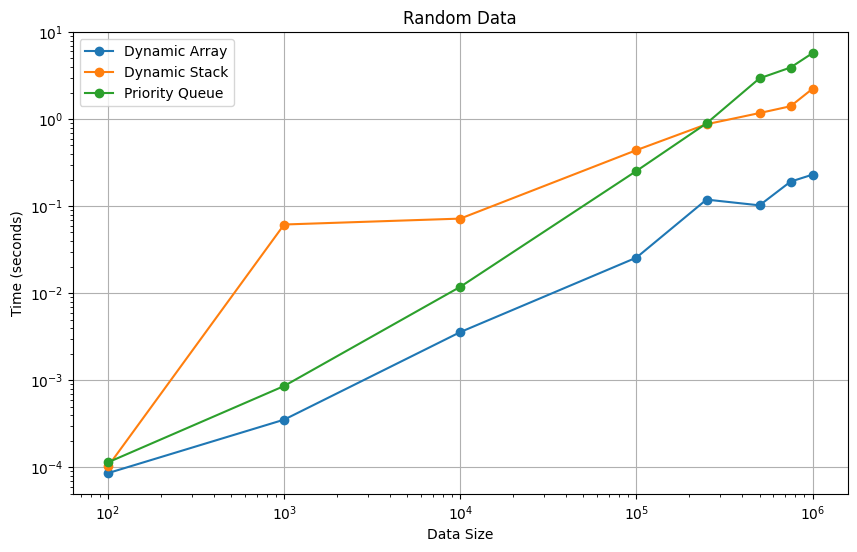

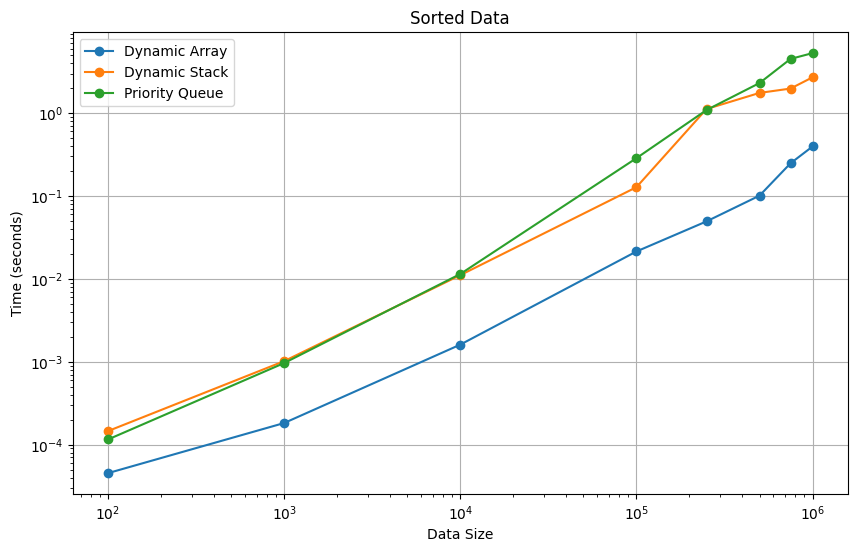

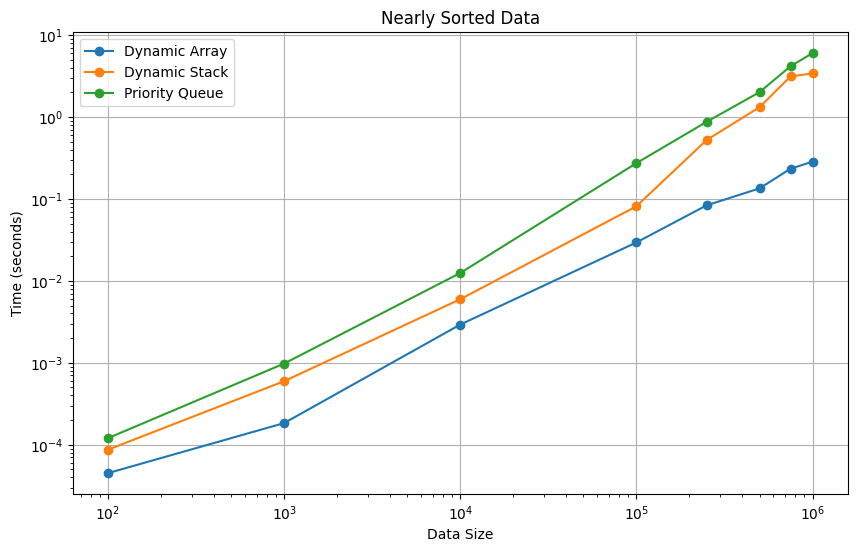

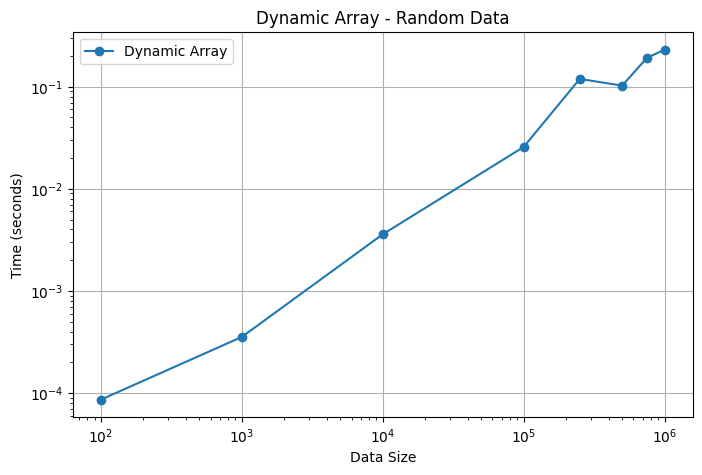

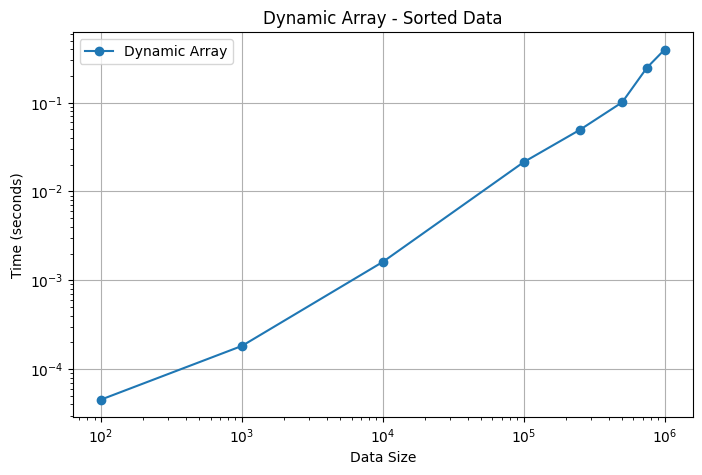

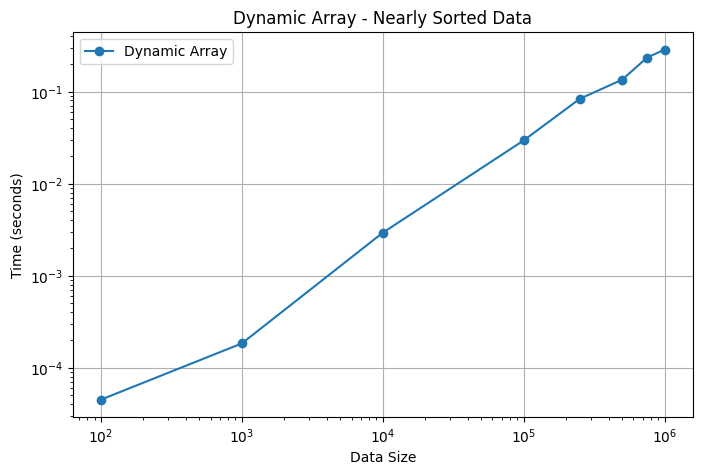

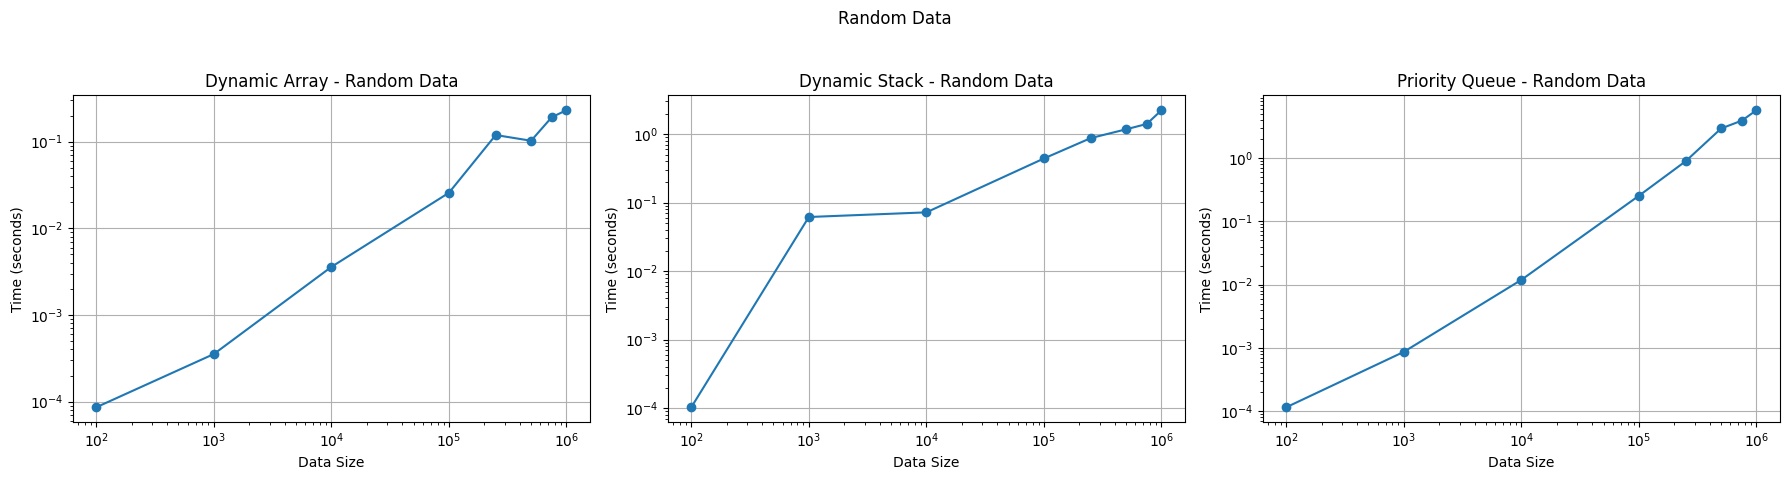

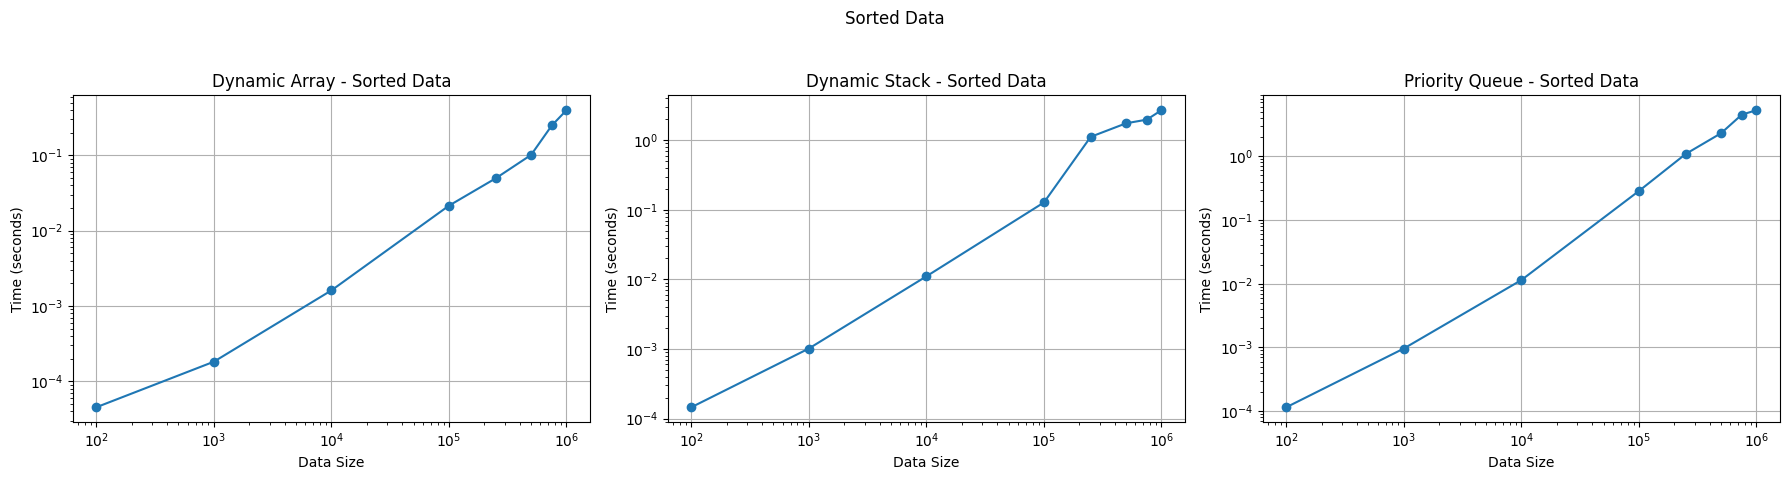

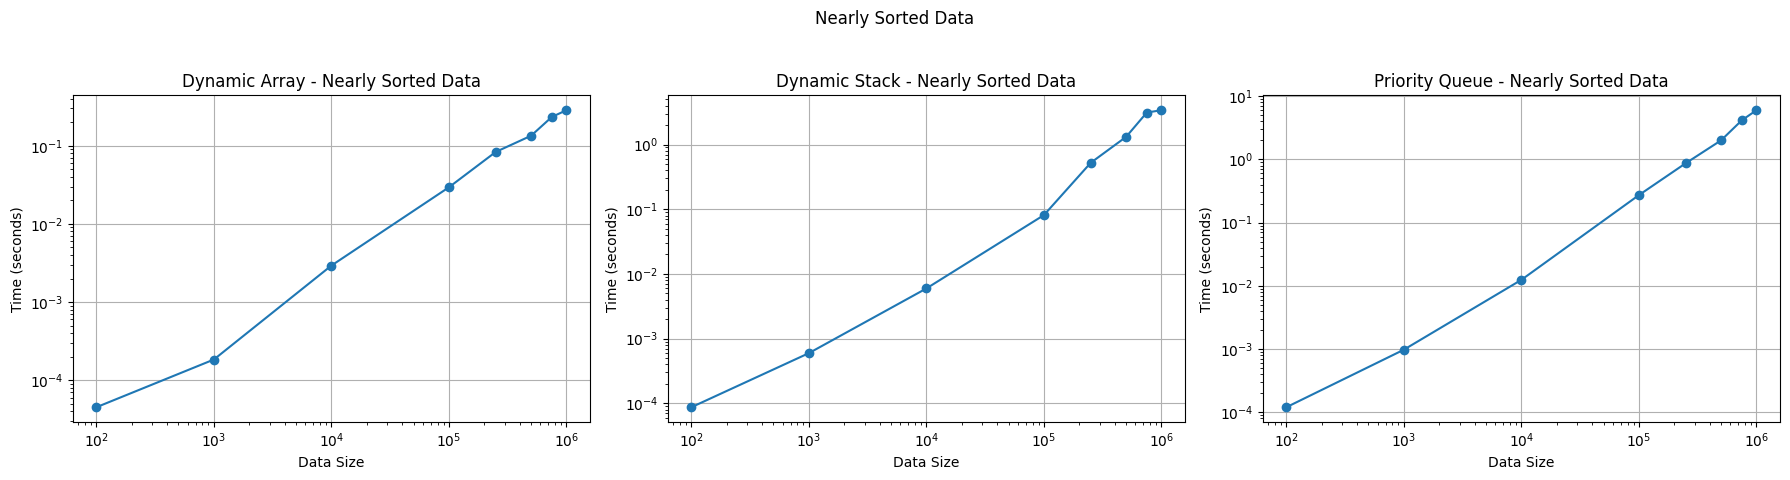

In [3]:
import unittest
import time
import random
import heapq  # Python's built-in heap implementation
import matplotlib.pyplot as plt
import numpy as np

# --- Dataset Generation and Storage ---

def generate_random_dataset(size, filename="random_data.txt"):
    """Generates a list of random integers and stores it in a text file."""
    data = [random.randint(0, size * 10) for _ in range(size)]  # Wider range
    with open(filename, "w") as f:
        for item in data:
            f.write(str(item) + "\n")
    return data

def generate_sorted_dataset(size, filename="sorted_data.txt"):
    """Generates a list of sorted integers and stores it in a text file."""
    data = list(range(size))
    with open(filename, "w") as f:
        for item in data:
            f.write(str(item) + "\n")
    return data

def generate_nearly_sorted_dataset(size, inversions=0.05, filename="nearly_sorted_data.txt"):
    """Generates a nearly sorted list and stores it in a text file."""
    data = list(range(size))
    num_inversions = int(size * inversions)
    for _ in range(num_inversions):
        i, j = random.sample(range(size), 2)
        data[i], data[j] = data[j], data[i]
    with open(filename, "w") as f:
        for item in data:
            f.write(str(item) + "\n")
    return data

def load_dataset(filename):
    """Loads a dataset from a text file."""
    data = []
    with open(filename, "r") as f:
        for line in f:
            try:
                data.append(int(line.strip()))  # Ensure integers
            except ValueError:
                print(f"Warning: Skipping invalid line in {filename}: {line.strip()}")
                continue  # Skip to the next line
    return data

# --- Implementations of Data Structures ---

class DynamicArray:  # Resizable Array
    """
    A dynamic array (resizable array) implementation.  Provides O(1) amortized
    insertion at the end and O(1) access by index. Resizing has O(n) complexity.
    """
    def __init__(self, capacity=10):
        self.capacity = capacity
        self.size = 0
        self.array = [None] * capacity

    def __len__(self):
        return self.size

    def __getitem__(self, index):
        if not 0 <= index < self.size:
            raise IndexError("Index out of bounds")
        return self.array[index]

    def append(self, item):
        """
        Appends an item to the end of the array.  Resizes if necessary.
        Amortized O(1) complexity.
        """
        if self.size == self.capacity:
            self._resize(2 * self.capacity)  # Double the capacity
        self.array[self.size] = item
        self.size += 1

    def _resize(self, new_capacity):
        """
        Resizes the array to a new capacity.  O(n) complexity.
        """
        new_array = [None] * new_capacity
        for i in range(self.size):
            new_array[i] = self.array[i]
        self.array = new_array
        self.capacity = new_capacity


class Node:
    """
    A node for the linked list used in the DynamicStack.
    """
    def __init__(self, data):
        self.data = data
        self.next = None

class DynamicStack:  # Linked List based Stack
    """
    A dynamic stack implemented using a linked list. Provides O(1) push and pop
    operations.
    """
    def __init__(self):
        self.head = None
        self.size = 0

    def __len__(self):
        return self.size

    def push(self, data):
        """
        Pushes an item onto the stack. O(1) complexity.
        """
        new_node = Node(data)
        new_node.next = self.head
        self.head = new_node
        self.size += 1

    def pop(self):
        """
        Pops an item from the stack. O(1) complexity.
        Returns None if the stack is empty.
        """
        if self.head is None:
            return None  # Or raise an exception
        data = self.head.data
        self.head = self.head.next
        self.size -= 1
        return data

class PriorityQueue:
    """
    A priority queue implemented using Python's `heapq` module (binary heap).
    Provides O(log n) push and pop operations.
    """
    def __init__(self):
        self.heap = []

    def push(self, item, priority):
        """
        Pushes an item onto the priority queue with a given priority. O(log n).
        """
        heapq.heappush(self.heap, (priority, item))

    def pop(self):
        """
        Pops the highest priority item from the queue. O(log n).
        Returns None if the queue is empty.
        """
        if self.heap:
            return heapq.heappop(self.heap)[1]  # Return item, not priority
        else:
            return None

# --- Unit Tests ---

class TestDynamicArray(unittest.TestCase):

    def test_append_and_len(self):
        arr = DynamicArray()
        self.assertEqual(len(arr), 0)
        arr.append(10)
        self.assertEqual(len(arr), 1)
        arr.append(20)
        self.assertEqual(len(arr), 2)

    def test_getitem(self):
        arr = DynamicArray()
        arr.append(10)
        arr.append(20)
        self.assertEqual(arr[0], 10)
        self.assertEqual(arr[1], 20)
        with self.assertRaises(IndexError):
            _ = arr[2]

    def test_resize(self):
        arr = DynamicArray(capacity=2)
        arr.append(10)
        arr.append(20)
        arr.append(30)  # Trigger resize
        self.assertEqual(len(arr), 3)
        self.assertEqual(arr[0], 10)
        self.assertEqual(arr[1], 20)
        self.assertEqual(arr[2], 30)
        self.assertEqual(arr.capacity, 4)

class TestDynamicStack(unittest.TestCase):

    def test_push_and_pop(self):
        stack = DynamicStack()
        self.assertEqual(len(stack), 0)
        stack.push(10)
        self.assertEqual(len(stack), 1)
        stack.push(20)
        self.assertEqual(len(stack), 2)
        self.assertEqual(stack.pop(), 20)
        self.assertEqual(len(stack), 1)
        self.assertEqual(stack.pop(), 10)
        self.assertEqual(len(stack), 0)
        self.assertIsNone(stack.pop())

class TestPriorityQueue(unittest.TestCase):

    def test_push_and_pop(self):
        pq = PriorityQueue()
        pq.push(10, 2)  # (item, priority)
        pq.push(20, 1)
        pq.push(30, 3)
        self.assertEqual(pq.pop(), 20)
        self.assertEqual(pq.pop(), 10)
        self.assertEqual(pq.pop(), 30)
        self.assertIsNone(pq.pop())

# --- Benchmarking Functions ---

def benchmark_dynamic_array(data, data_sizes):
    """
    Benchmarks the DynamicArray append operation.
    """
    times = []
    for size in data_sizes:
        current_data = data[:size]
        start_time = time.time()
        arr = DynamicArray()
        for item in current_data:
            arr.append(item)
        end_time = time.time()
        times.append(end_time - start_time)
    return times

def benchmark_dynamic_stack(data, data_sizes):
    """
    Benchmarks the DynamicStack push and pop operations.
    """
    times = []
    for size in data_sizes:
        current_data = data[:size]
        start_time = time.time()
        stack = DynamicStack()
        for item in current_data:
            stack.push(item)
        # Important: Also include popping to make the benchmark realistic
        while stack.size > 0:
            stack.pop()
        end_time = time.time()
        times.append(end_time - start_time)
    return times

def benchmark_priority_queue(data, data_sizes):
    """
    Benchmarks the PriorityQueue push and pop operations.
    """
    times = []
    for size in data_sizes:
        current_data = data[:size]
        start_time = time.time()
        pq = PriorityQueue()
        for item in current_data:
            pq.push(item, random.random())  # Assign random priority
        while pq.heap:
            pq.pop()
        end_time = time.time()
        times.append(end_time - start_time)
    return times

# --- Analysis Table Generation ---

def generate_analysis_table(data_sizes, array_times, stack_times, pq_times):
    """
    Generates an analysis table as a string.
    """
    table = """
| Data Size | Dynamic Array Time (s) | Dynamic Stack Time (s) | Priority Queue Time (s) |
|-----------|------------------------|------------------------|--------------------------|
"""
    for i in range(len(data_sizes)):
        table += f"| {data_sizes[i]:,} | {array_times[i]:.6f} | {stack_times[i]:.6f} | {pq_times[i]:.6f} |\n"
    return table

# --- Plotting Functions ---

def plot_data_structure_performance(data_sizes, array_times, stack_times, pq_times, title, filename="data_structure_performance.png"):
    """
    Generates a plot of data structure performance.
    """
    plt.figure(figsize=(10, 6))
    plt.plot(data_sizes, array_times, marker='o', label='Dynamic Array')
    plt.plot(data_sizes, stack_times, marker='o', label='Dynamic Stack')
    plt.plot(data_sizes, pq_times, marker='o', label='Priority Queue')

    plt.xlabel('Data Size')
    plt.ylabel('Time (seconds)')
    plt.title(title)
    plt.legend()
    plt.grid(True)
    plt.xscale('log') # Use a logarithmic scale for x-axis
    plt.yscale('log')
    plt.savefig(filename) # Save the plot to a file.
    plt.show()

def plot_individual_performance(data_sizes, times, data_structure_name, title, filename=None):
    """
    Generates a plot for a single data structure.
    """
    plt.figure(figsize=(8, 5))
    plt.plot(data_sizes, times, marker='o', label=data_structure_name)
    plt.xlabel('Data Size')
    plt.ylabel('Time (seconds)')
    plt.title(title)
    plt.legend()
    plt.grid(True)
    plt.xscale('log')
    plt.yscale('log')
    if filename:
        plt.savefig(filename)
    plt.show()

def plot_merged_performance(data_sizes, array_times, stack_times, pq_times, title, filename="merged_performance.png"):
  """Generates a merged plot with subplots for each data structure."""
  fig, axes = plt.subplots(1, 3, figsize=(18, 5))  # 1 row, 3 columns of subplots

  # Dynamic Array subplot
  axes[0].plot(data_sizes, array_times, marker='o', label='Dynamic Array')
  axes[0].set_xlabel('Data Size')
  axes[0].set_ylabel('Time (seconds)')
  axes[0].set_title(f'Dynamic Array - {title}')
  axes[0].grid(True)
  axes[0].set_xscale('log')
  axes[0].set_yscale('log')

  # Dynamic Stack subplot
  axes[1].plot(data_sizes, stack_times, marker='o', label='Dynamic Stack')
  axes[1].set_xlabel('Data Size')
  axes[1].set_ylabel('Time (seconds)')
  axes[1].set_title(f'Dynamic Stack - {title}')
  axes[1].grid(True)
  axes[1].set_xscale('log')
  axes[1].set_yscale('log')

  # Priority Queue subplot
  axes[2].plot(data_sizes, pq_times, marker='o', label='Priority Queue')
  axes[2].set_xlabel('Data Size')
  axes[2].set_ylabel('Time (seconds)')
  axes[2].set_title(f'Priority Queue - {title}')
  axes[2].grid(True)
  axes[2].set_xscale('log')
  axes[2].set_yscale('log')

  plt.suptitle(title)
  plt.tight_layout(rect=[0, 0.03, 1, 0.95])  # Adjust layout to make space for suptitle
  plt.savefig(filename)
  plt.show()

# --- Main Execution & Plotting ---

if __name__ == "__main__":
    # Run unit tests first
    unittest.main(argv=['first-arg-is-ignored'], exit=False) # Disable exit to continue execution

    data_sizes = [100, 1000, 10000, 100000, 250000, 500000, 750000, 1000000]  # Adjust as needed

    # --- Generate and Store Datasets ---
    random_data = generate_random_dataset(max(data_sizes), "random_data.txt")
    sorted_data = generate_sorted_dataset(max(data_sizes), "sorted_data.txt")
    nearly_sorted_data = generate_nearly_sorted_dataset(max(data_sizes), filename="nearly_sorted_data.txt")

    # --- Load Datasets (uncomment if you want to load from file instead of generating)---
    #random_data = load_dataset("random_data.txt")
    #sorted_data = load_dataset("sorted_data.txt")
    #nearly_sorted_data = load_dataset("nearly_sorted_data.txt")


    # --- Benchmark with Random Data ---
    array_times_random = benchmark_dynamic_array(random_data, data_sizes)
    stack_times_random = benchmark_dynamic_stack(random_data, data_sizes)
    pq_times_random = benchmark_priority_queue(random_data, data_sizes)

    # --- Benchmark with Sorted Data ---
    array_times_sorted = benchmark_dynamic_array(sorted_data, data_sizes)
    stack_times_sorted = benchmark_dynamic_stack(sorted_data, data_sizes)
    pq_times_sorted = benchmark_priority_queue(sorted_data, data_sizes)

    # --- Benchmark with Nearly Sorted Data ---
    array_times_nearly_sorted = benchmark_dynamic_array(nearly_sorted_data, data_sizes)
    stack_times_nearly_sorted = benchmark_dynamic_stack(nearly_sorted_data, data_sizes)
    pq_times_nearly_sorted = benchmark_priority_queue(nearly_sorted_data, data_sizes)

    # --- Generate and Print Analysis Tables ---
    print("--- Analysis Table (Random Data) ---")
    print(generate_analysis_table(data_sizes, array_times_random, stack_times_random, pq_times_random))

    print("--- Analysis Table (Sorted Data) ---")
    print(generate_analysis_table(data_sizes, array_times_sorted, stack_times_sorted, pq_times_sorted))

    print("--- Analysis Table (Nearly Sorted Data) ---")
    print(generate_analysis_table(data_sizes, array_times_nearly_sorted, stack_times_nearly_sorted, pq_times_nearly_sorted))

    # --- Plotting ---
    plot_data_structure_performance(data_sizes, array_times_random, stack_times_random, pq_times_random, "Random Data", "data_structure_performance_random.png")
    plot_data_structure_performance(data_sizes, array_times_sorted, stack_times_sorted, pq_times_sorted, "Sorted Data", "data_structure_performance_sorted.png")
    plot_data_structure_performance(data_sizes, array_times_nearly_sorted, stack_times_nearly_sorted, pq_times_nearly_sorted, "Nearly Sorted Data", "data_structure_performance_nearly_sorted.png")

    plot_individual_performance(data_sizes, array_times_random, "Dynamic Array", "Dynamic Array - Random Data", "dynamic_array_performance_random.png")
    plot_individual_performance(data_sizes, array_times_sorted, "Dynamic Array", "Dynamic Array - Sorted Data", "dynamic_array_performance_sorted.png")
    plot_individual_performance(data_sizes, array_times_nearly_sorted, "Dynamic Array", "Dynamic Array - Nearly Sorted Data", "dynamic_array_performance_nearly_sorted.png")

    plot_merged_performance(data_sizes, array_times_random, stack_times_random, pq_times_random, "Random Data", "merged_performance_random.png")
    plot_merged_performance(data_sizes, array_times_sorted, stack_times_sorted, pq_times_sorted, "Sorted Data", "merged_performance_sorted.png")
    plot_merged_performance(data_sizes, array_times_nearly_sorted, stack_times_nearly_sorted, pq_times_nearly_sorted, "Nearly Sorted Data", "merged_performance_nearly_sorted.png")